In [1]:
import os

for dirname, _, filenames in os.walk('/LearningML\ANN Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/LearningML\ANN Project\archive.zip
/LearningML\ANN Project\Arrhythmia_Classification.ipynb
/LearningML\ANN Project\cnn_model.h5
/LearningML\ANN Project\ptbdb_abnormal.csv
/LearningML\ANN Project\ptbdb_normal.csv
/LearningML\ANN Project\.ipynb_checkpoints\Arrhythmia_Classification-checkpoint.ipynb
/LearningML\ANN Project\ECG_Dataset\mitbih_test.csv
/LearningML\ANN Project\ECG_Dataset\mitbih_train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('ECG_Dataset/mitbih_train.csv', header=None)
test_df = pd.read_csv('ECG_Dataset/mitbih_test.csv', header=None)

In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


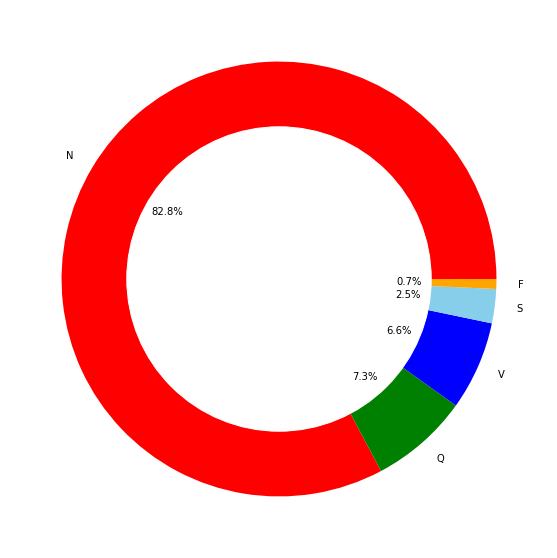

In [6]:
plt.figure(figsize=(20,10))
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['N', 'Q', 'V', 'S', 'F'], 
        colors=['red','green','blue','skyblue','orange'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [7]:
from sklearn.utils import resample

df_1 = train_df[train_df[187]==1]
df_2 = train_df[train_df[187]==2]
df_3 = train_df[train_df[187]==3]
df_4 = train_df[train_df[187]==4]
df_0 = (train_df[train_df[187]==0]).sample(n=40000, random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=40000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=40000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=40000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=40000,random_state=126)

train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [8]:
equilibre = train_df[187].value_counts()
print(equilibre)

4    40000
3    40000
2    40000
1    40000
0    40000
Name: 187, dtype: int64


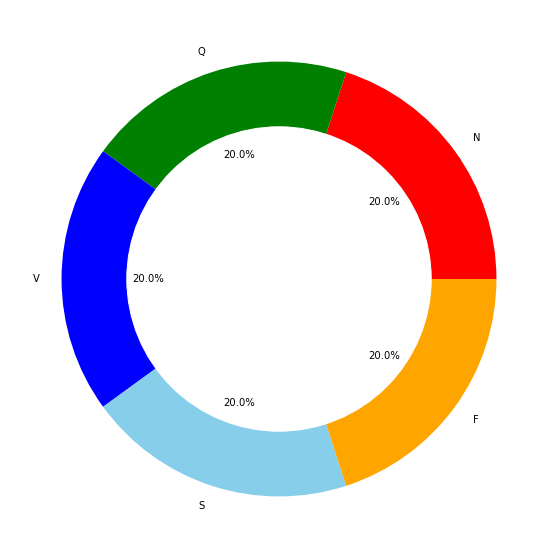

In [9]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['N', 'Q', 'V', 'S', 'F'], 
        colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [10]:
c = train_df.groupby(187, group_keys=False).apply(lambda train_df: train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
49085,0.927210,0.852686,0.348354,0.000000,0.074523,0.192374,0.230503,0.261698,0.266898,0.266898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74094,1.000000,0.779891,0.317935,0.171196,0.182065,0.130435,0.081522,0.081522,0.070652,0.067935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76800,0.777439,0.695122,0.487805,0.271341,0.085366,0.000000,0.094512,0.036585,0.051829,0.091463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80665,1.000000,0.938053,0.716814,0.394437,0.125158,0.112516,0.131479,0.096081,0.072061,0.067004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83165,0.936646,0.872050,0.798758,0.736646,0.679503,0.619876,0.520497,0.401242,0.270807,0.190062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


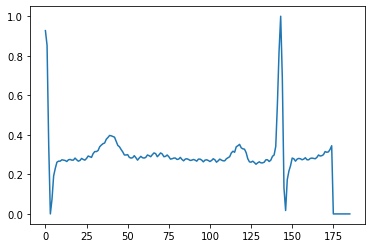

In [11]:
plt.plot(c.iloc[0,:186])

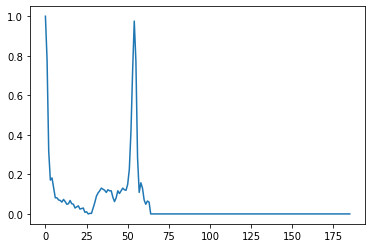

In [12]:
plt.plot(c.iloc[1,:186])

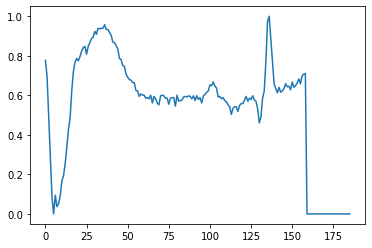

In [13]:
plt.plot(c.iloc[2,:186])

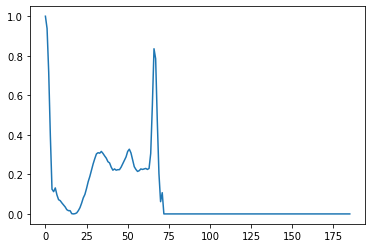

In [14]:
plt.plot(c.iloc[3,:186])


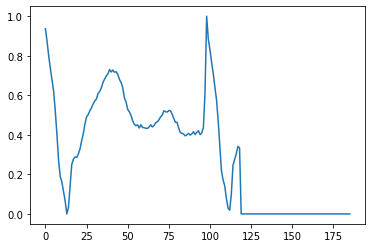

In [15]:
plt.plot(c.iloc[4,:186])

In [16]:
#adding noise to the data to generalize
def add_gaussian_noise(signal):
    noise = np.random.normal(0,0.5,186)
    return (signal+noise)

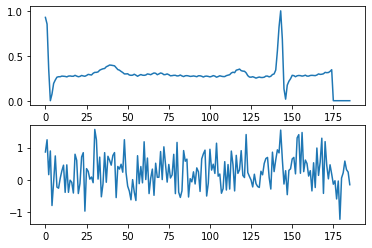

In [17]:
tempo = c.iloc[0,:186]
bruiter = add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [18]:
target_train = train_df[187]
target_test = test_df[187]
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [19]:
X_train = train_df.iloc[:, :186].values
X_test = test_df.iloc[:, :186].values

for i in range(len(X_train)):
    X_train[i,:186] = add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200000, 186, 1)
(200000, 5)
(21892, 186, 1)
(21892, 5)


### NETWORK

In [28]:
def network(X_train, y_train, X_test, y_test):
    im_shape = (X_train.shape[1], 1)
    inputs_cnn = Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [29]:
def evaluate_model(history,X_test,y_test,model):
    keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [30]:
!pip install pydot
!pip install graphviz
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
6250/6250 [==============================] - 115s 18ms/step - loss: 0.8586 - accuracy: 0.6709 - val_loss: 0.9384 - val_accuracy: 0.6478
Epoch 2/40
1257/6250 [=====>........................] - ETA: 1:22 - loss: 0.7728 - accuracy: 0.7049

KeyboardInterrupt: 

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)